
# NIH.AI Workshop: Molecular Features
aclyde@anl.gov

In this notebook tutorial, we will go over the process of generating vector-based features of molecules. We will require the following if you want to bring in your own data sources:

1. The data is in valid .smi format, consiting of a smile string followed by a space, follwoing by the name of the molecule. 
2. The data is smaller than 10k, otherwise this will take a while and you should consider switching to a compute cluster or parallel algorithm.

To begin, we rely heavily on RDKit: http://www.rdkit.org

The best way to install RDKit is via Conda: https://docs.conda.io/en/latest/miniconda.html

for instance:
```bash
conda create -n myenv python=3.6 #do this once when you want a new env
conda activate myenv #load up the env, do this everytime you create a new shell
conda install -c rdkit rdkit #install RDkit
```

# Molecular Modes

We will be discussing SMILES and their related input. Please read more about SMILES:
https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system

In general if you stick with one peice of software, there is a standard method to cannonicalize SMILES. Each SMILES refers to a precise molecule, though each molecule has multiple  SMILES. 

You can also use pdb,SDF, mol2, and other formats but I will not discuss those. 

https://rdkit.org/docs/GettingStartedInPython.html

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults

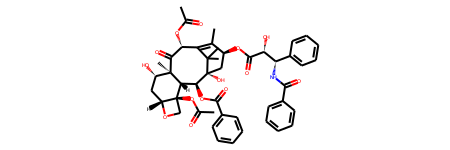

In [6]:
paclitaxel = 'CC1=C2[C@@]([C@]([C@H]([C@@H]3[C@]4([C@H](OC4)C[C@@H]([C@]3(C(=O)[C@@H]2OC(=O)C)C)O)OC(=O)C)OC(=O)c5ccccc5)(C[C@@H]1OC(=O)[C@H](O)[C@@H](NC(=O)c6ccccc6)c7ccccc7)O)(C)C'
Chem.MolFromSmiles(paclitaxel)

# Exploring a new chemical database

In [ ]:
# Compute fingerprints

# Preparing Features for $\mathcal{D}$
In the other section of this talk we discussed preparing feature representation methods. We need to create vector or other representations to use. 

## Generating Properties
https://github.com/mordred-descriptor/mordred


In [7]:
from rdkit import Chem
from mordred import Calculator, descriptors

# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

# calculate single molecule
mol = Chem.MolFromSmiles('c1ccccc1')
calc(mol)[:3]

[4.242640687119286, 3.9999999999999996, 0]

In [8]:
# calculate multiple molecule
mols = [Chem.MolFromSmiles(smi) for smi in ['c1ccccc1Cl', 'c1ccccc1O', 'c1ccccc1N']]

# as pandas
df = calc.pandas(mols)

100%|██████████| 3/3 [00:00<00:00, 26.40it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,5.059137,4.785854,0,0,8.720566,2.101003,4.202006,8.720566,1.245795,2.844305,...,8.124151,33.544698,112.007978,9.333998,42,5,30.0,31.0,2.361111,1.666667
1,5.059137,4.785854,0,0,8.720566,2.101003,4.202006,8.720566,1.245795,2.844305,...,8.124151,33.544698,94.041865,7.233990,42,5,30.0,31.0,2.361111,1.666667
2,5.059137,4.785854,0,0,8.720566,2.101003,4.202006,8.720566,1.245795,2.844305,...,8.124151,33.544698,93.057849,6.646989,42,5,30.0,31.0,2.361111,1.666667
